In [1]:
import pandas as pd
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Data source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data


Description: Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
data= pd.read_csv('/content/heart.csv')
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
print(data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
x = data.drop('target', axis=1)
y = data['target']



In [6]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=0)

scaler= StandardScaler()
scale= scaler.fit(x_train)
x_train= scale.transform(x_train)
x_test= scale.transform(x_test)
model= LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
score= accuracy_score(y_test, y_pred)
score

0.8634146341463415

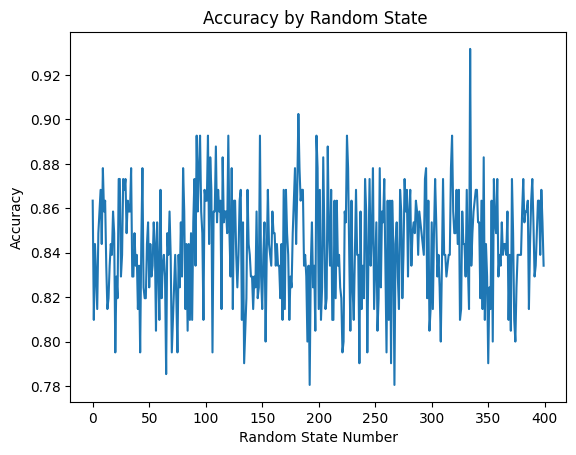

0.9317073170731708


In [7]:
accuracy_list= []
random_state_list=[]
for i in range(0,400):
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=i)

  scaler= StandardScaler()
  scale= scaler.fit(x_train)
  x_train= scale.transform(x_train)
  x_test= scale.transform(x_test)
  model= LogisticRegression()
  model.fit(x_train, y_train)
  y_pred= model.predict(x_test)
  score= accuracy_score(y_test, y_pred)
  accuracy_list.append(score)
  random_state_list.append(i)

plt.plot(random_state_list,accuracy_list)
plt.xlabel('Random State Number')
plt.ylabel('Accuracy')
plt.title('Accuracy by Random State ')
plt.show()
print(max(accuracy_list))

In [ ]:
accuracy_list= []
random_state_list=[]
for i in range(0,400):
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=i)

  scaler= StandardScaler()
  scale= scaler.fit(x_train)
  x_train= scale.transform(x_train)
  x_test= scale.transform(x_test)
  model= LogisticRegression()
  model.fit(x_train, y_train)
  y_pred= model.predict(x_test)
  score= accuracy_score(y_test, y_pred)
  accuracy_list.append(score)
  random_state_list.append(i)
  print(f'the accuracy is {score} when i is {i}')

the accuracy is 0.8634146341463415 when i is 0
the accuracy is 0.8097560975609757 when i is 1
the accuracy is 0.8439024390243902 when i is 2
the accuracy is 0.8292682926829268 when i is 3
the accuracy is 0.8146341463414634 when i is 4
the accuracy is 0.848780487804878 when i is 5
the accuracy is 0.8585365853658536 when i is 6
the accuracy is 0.8682926829268293 when i is 7
the accuracy is 0.8439024390243902 when i is 8
the accuracy is 0.8780487804878049 when i is 9
the accuracy is 0.8585365853658536 when i is 10
the accuracy is 0.8634146341463415 when i is 11
the accuracy is 0.8341463414634146 when i is 12
the accuracy is 0.8146341463414634 when i is 13
the accuracy is 0.8195121951219512 when i is 14
the accuracy is 0.8341463414634146 when i is 15
the accuracy is 0.8439024390243902 when i is 16
the accuracy is 0.8390243902439024 when i is 17
the accuracy is 0.8585365853658536 when i is 18
the accuracy is 0.848780487804878 when i is 19
the accuracy is 0.7951219512195122 when i is 20
the 

The maximum score is .9317 when the random state = 334

In [ ]:
accuracy_list= []
test_size_list=[]
for i in range(1, 99):
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=i/100, random_state=334)

  scaler= StandardScaler()
  scale= scaler.fit(x_train)
  x_train= scale.transform(x_train)
  x_test= scale.transform(x_test)
  model= LogisticRegression()
  model.fit(x_train, y_train)
  y_pred= model.predict(x_test)
  score= accuracy_score(y_test, y_pred)
  accuracy_list.append(score)
  test_size_list.append(i)

plt.plot(test_size_list,accuracy_list)
plt.xlabel('Test Size* 100')
plt.ylabel('Accuracy')
plt.title('Accuracy by Test Size*100 ')
plt.show()
print(max(accuracy_list))

In [ ]:
accuracy_list= []
test_size_list=[]
for i in range(1, 99):
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=i/100, random_state=334)

  scaler= StandardScaler()
  scale= scaler.fit(x_train)
  x_train= scale.transform(x_train)
  x_test= scale.transform(x_test)
  model= LogisticRegression()
  model.fit(x_train, y_train)
  y_pred= model.predict(x_test)
  score= accuracy_score(y_test, y_pred)
  accuracy_list.append(score)
  test_size_list.append(i)
  print(f'accuracy is {score} when i is {i}')

Optimal Test Size happens at i=4, which 4/100= .04 given random_state = 334

In [ ]:
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=4/100, random_state=334)

  scaler= StandardScaler()
  scale= scaler.fit(x_train)
  x_train= scale.transform(x_train)
  x_test= scale.transform(x_test)
  model= LogisticRegression()
  model.fit(x_train, y_train)
  y_pred= model.predict(x_test)
  score= accuracy_score(y_test, y_pred)
  score

Note: After optimizing Accuracy went from .863 to .975

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:

logr= model.coef_
intercept= model.intercept_
print(logr)
print(intercept)

In [ ]:
b0,b1,b2,b3,b4,b5,b6,b7,b8,b9, b10,b11, b12, b13, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13 = smp.symbols('b_0 b1 b2 b3 b4 b5 b6 b7 b8 b9 b10 b11 b12 b13 x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12 x13', real= True)

In [ ]:
f= b0+ b1*x1 + b2*x2+ b3*x3+ b4*x4+ b5*x5+ b6*x6+ b7*x7+ b8*x8+b9*x9+ b10*x10+b11*x11+ b12*x12+ b13*x13
f

In [ ]:
g= f.subs([(b0,-0.1984), (b1,-0.0641), (b2,-0.8192), (b3,0.84656), (b4,-0.3037),
        (b5,-0.2930), (b6,-0.03265), (b7,0.201 ), (b8, 0.5107), (b9,-0.4547),
        (b10,-0.6421),(b11,0.3283),(b12,-0.7618), (b13,-0.5287 )])
g

In [ ]:
exponential= (smp.exp(-g))+1
exponential

In [ ]:
SigmoidFunction= 1/exponential
SigmoidFunction

Note: x1 can be any number

x2 can only be 0 or 1

x3 can be 0,1,2,3

x4 can be from (94, 200)

x5 can be from (126,564)

x6 can be 0 or 1

x7 can be 0,1, or 2

x8 can be from (71, 202)

x9 can be 0 or 1

x10 can be from (0, 6.2)

x11 can 0,1,2

x12 can be 0,1,2,3,4

x13 can be 0,1,2,3